In [6]:
# Import the required libraries
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt  # for creating plots of the data
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score
import itertools

# Import our own library, which has some utility functions and the Naive Bayes Classifier we created
import CatNB 


In [7]:
# The dataset is in the Data folder (this is the same data as for the Logistic Regression Example)
DATASET_PATH = 'Data/'

# Read the data from the CSV file
data_path = os.path.join(DATASET_PATH, 'census1.csv')
censusData = pd.read_csv(data_path, na_values = ["?", " ?"], encoding = "utf-7") # we know that libreOffice is using utf-7 encoding

# Because the CSV doesn't contain any header, we add column names 
# using the description from the original dataset website 
# http://mlr.cs.umass.edu/ml/machine-learning-databases/adult

censusData.columns = [
    "Age", "WorkClass", "FnlWgt",
    "Education", "EducationNum", "MaritalStatus",
    "Occupation", "Relationship", "Race", "Gender", 
    "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"]


In [4]:
# Get to know the data with head, describe, and info methods

# Visualise a table with the first rows of the dataset, to
# better understand the data format
print(censusData.head())
print(censusData.describe())
print(censusData.info())

   Age          WorkClass  FnlWgt   Education  EducationNum  \
0   50   Self-emp-not-inc   83311   Bachelors            13   
1   38            Private  215646     HS-grad             9   
2   53            Private  234721        11th             7   
3   28            Private  338409   Bachelors            13   
4   37            Private  284582     Masters            14   

         MaritalStatus          Occupation    Relationship    Race   Gender  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   CapitalGain  CapitalLoss  HoursPerWeek   NativeCountry  Income  
0            0            0            13   United-States   <=50K  
1         

In [8]:
X = censusData.drop(["Income"], axis = 1)
Y = censusData.Income
# Now, lets split the data into train and test sets:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 18)

In [9]:
CNB = CatNB.CategoricalNaiveBayes()  # instantiate a Categorical Naive Bayes object 

In [17]:
trainData = X_train.assign(Income = Y_train)
model = CNB.fit(trainData)
model.aggregateTotals

,WorkClass,Education,MaritalStatus,Occupation,Relationship,Race,Gender,NativeCountry
Income,,,,,,,,
<=50K,18429,19740,19740,18422,19740,19740,19740,19401
>50K,6158,6308,6308,6158,6308,6308,6308,6196


Das Modell hat sich aus den Zensus Daten die Kategorischen Attributen ausgesucht.  Wir können hier schon eine Vorhersage machen, und dann eine Confusion Matrix mit dem Resultat erstellen.

In [18]:
testData = X_test.assign(Income = Y_test)
Y_pred_NB = model.predict(testData)


Confusion matrix, without normalization
[[4078  901]
 [ 382 1151]]
Normalized confusion matrix
[[0.82 0.18]
 [0.25 0.75]]


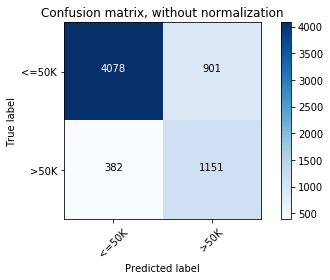

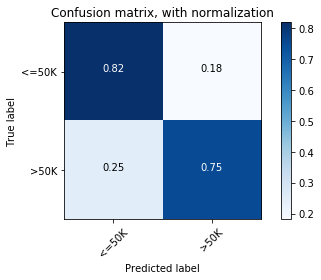

In [19]:

trueY = Y_test == " >50K"
predY = Y_pred_NB.MaxClass == ">50K"


# Compute confusion matrix
cnf_matrix = confusion_matrix(trueY, predY)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
CatNB.plot_confusion_matrix(cnf_matrix, classes=["<=50K", ">50K"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
CatNB.plot_confusion_matrix(cnf_matrix, classes=["<=50K", ">50K"], normalize = True,
                      title='Confusion matrix, with normalization')